In [28]:
from sklearn.datasets import fetch_openml
import time
import numpy as np
from numpy import linalg as LA
from sklearn.model_selection import train_test_split
import time
import matplotlib.pyplot as plt

In [29]:
with np.load('mnist.npz') as data:
    xx = data['x_train']
    yy = data['y_train']

xx = xx.reshape(-1, 784) / 255.  
yy = yy.astype(np.int64)

m = xx.shape[0]
n = xx.shape[1] + 1

X = np.concatenate((np.ones([m,1]),xx), axis=1)  

cat = np.zeros([m,10])
for ind, num in enumerate(yy):
    cat[ind][num] = 1
Y = cat

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.15, random_state=42)


In [3]:
print(f'- X original: {X.shape[0]} x {X.shape[1]}')
print(f'- Y original: {Y.shape[0]} x {Y.shape[1]}')
print(f'- X Train: {x_train.shape[0]} x {x_train.shape[1]}')
print(f'- Y train: {y_train.shape[0]} x {y_train.shape[1]}')
print(f'- X Test: {x_test.shape[0]} x {x_test.shape[1]}')
print(f'- Y Test: {y_test.shape[0]} x {y_test.shape[1]}')

information of datasets:
- X original: 60000 x 785
- Y original: 60000 x 10
- X Train: 51000 x 785
- Y train: 51000 x 10
- X Test: 9000 x 785
- Y Test: 9000 x 10


9


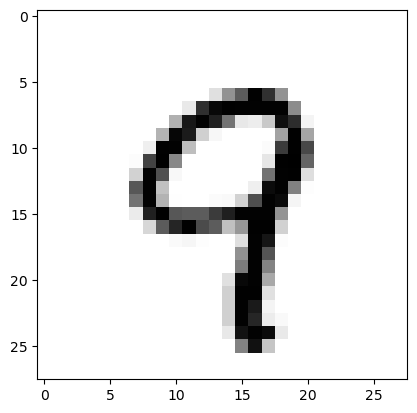

In [5]:
NumSample = np.random.randint(0,59500)
plt.imshow(np.reshape(x_train[NumSample][1:], [28,28]), cmap='Greys')
print(np.argmax(y_train[NumSample]))

In [7]:
N = len(ydual_train)
XPY = xdual_train
for i in range(N):
    if ydual_train[i]==-1:
        XPY[i,:] =-1 * xdual_train[i,:]   

A = np.matmul(XPY,XPY.transpose())

AT = A.transpose()

YM = np.outer(ydual_train[1:],ydual_train[1:])
AY = np.outer(A[0,1:],ydual_train[1:])
YA = np.outer(ydual_train[1:],A[0,1:])


Y0S = ydual_train[0]**2
M = AT[1:,1:] + A[0,0]*YM/Y0S - AY/ydual_train[0] - YA/ydual_train[0]


b = np.zeros(N-1)
b = 1 - ydual_train[1:]/ydual_train[0]


aw = np.zeros(N)
for i in range(2,N):
    aw[i] = (1-ydual_train[i]/ydual_train[0])/(A[i,i] + A[0,0]*ydual_train[i]**2/ydual_train[0]**2 
                                               - 2*A[0,i]*ydual_train[i]/ydual_train[0])

aw[0] = -sum(ydual_train[1:]*aw[1:])/ydual_train[0]

In [8]:
print(aw)
print(ydual_train)

[1.15005553e+02 0.00000000e+00 0.00000000e+00 ... 1.98644725e-02
 1.91423266e-02 0.00000000e+00]
[-1. -1. -1. ...  1.  1. -1.]


In [9]:
YA   = ydual_train*aw
wght = sum(xdual_train * YA[:,None])

In [10]:
b =sum(ydual_train - np.matmul(xdual_train,wght))/N
yfit = np.matmul(xdual_train,wght) + b
yfitsign = np.sign(yfit)
ydiff = yfitsign - np.asfarray(ydual_train)
wherediff = np.where(ydiff != 0)

In [11]:
print(wherediff)
print(yfitsign[:15])
print(ydual_train[:15])
print(len(wherediff[0])/len(ydual_train))

(array([], dtype=int64),)
[-1. -1. -1.  1. -1.  1. -1. -1. -1.  1.  1.  1.  1. -1. -1.]
[-1. -1. -1.  1. -1.  1. -1. -1. -1.  1.  1.  1.  1. -1. -1.]
0.0


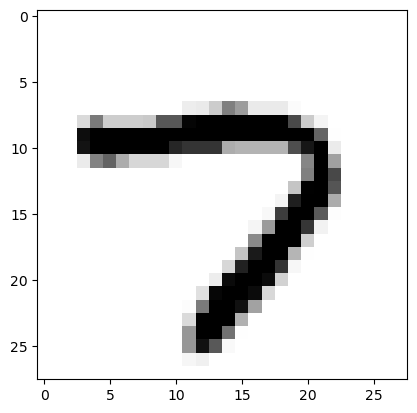

In [12]:
plt.imshow(np.reshape(xdual_train[9][:], [28,28]), cmap='Greys')

In [13]:
print(wght.shape)

(784,)


In [14]:
mwght = max(wght)
wghtimg=np.reshape(wght, [28,28])

In [15]:
wghtimg = wghtimg*225/mwght

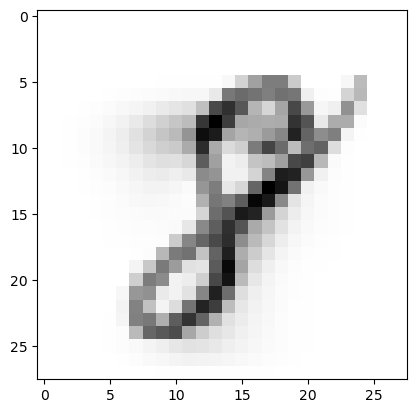

In [16]:
plt.imshow(wghtimg, cmap='Greys')

In [26]:
y_pred = np.sign(np.dot(xdual_test, wght) + b)

accuracy = np.mean(y_pred == ydual_test)

print(f"Accuracy: {accuracy * 100}%")


Accuracy: 53.74037403740374%
